In [1]:
import jcs_paper_util as util
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time

font = {
    'family':'serif', 
    'weight':'normal', 
    'size':8
}
matplotlib.rc('font', **font)

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
def show_results(results):
    #display((results == float('inf')).sum(0))
    #results = results.replace(float('inf'), float('nan'))
    display(results.describe())
    
    display(pd.DataFrame({i: st.wilcoxon(results[i], results['GreedyKS'])._asdict() for i in results if i != 'GreedyKS'}))
    
    fig, axs = plt.subplots(1, 2, figsize=(7.,2.))
    
    colors = sns.color_palette("Set1", 4)

    bps = axs[0].boxplot(results, vert=False, labels=results.columns, patch_artist=True)
    axs[0].set_xscale('log')
    axs[0].set_xlabel('DTW value')
    
    for i, j in zip(bps['boxes'],colors):
        i.set_facecolor(j)
        
    for i in bps['medians']:
        i.set_color('black')
    
    sns.ecdfplot(results, log_scale=True, ax=axs[1], palette=colors, legend=False)
    axs[1].grid()
    axs[1].set_ylim([-0.05, 1.05])
    axs[1].set_ylabel('Cumulative Probability')
    
    axs[1].set_xlabel('DTW value')
    
    
    
    fig.tight_layout()
    
    fig.savefig('./data_pdf_files/call_center.pdf')

In [3]:
ts_all = util.load_call_center_data()

In [4]:
num_bins, samples, period = 100, [i[1] for i in ts_all.groupby([ts_all.dt.isocalendar().week])], 'week'

results = util.get_results_call_center(num_bins, samples, 10)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [09:11<00:00, 10.40s/it]


In [5]:
filename = f'./data_pdf_files/call_center_{int(time.time())}.pkl'
results.to_pickle(filename)
print(filename)  # ./data_pdf_files/call_center_1653861580.pkl

./data_pdf_files/call_center_1653861580.pkl


,GreedyKS,Reservoir Sampling,IKS + RS,Lall + DDSketch
count,53.0000,53.0000,53.0000,53.0000
mean,537.5678,"12,862.1835","16,108.2035",785.9953
std,221.9466,"10,301.4913","9,947.7231",258.5317
min,117.1324,"1,120.7881","2,523.2513",268.2201
25%,403.3510,"2,810.3608","7,511.9639",580.2982
50%,497.7027,"9,846.2981","13,651.6537",787.9670
75%,647.9213,"24,151.2010","25,217.7896",915.9405
max,"1,193.8928","32,226.0063","39,794.1949","1,346.1508"


,Reservoir Sampling,IKS + RS,Lall + DDSketch
statistic,0.0000,0.0000,171.0000
pvalue,0.0000,0.0000,0.0000


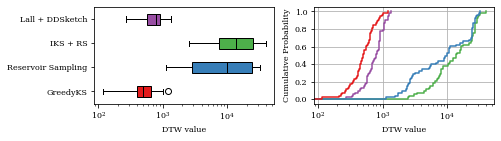

In [6]:
show_results(results)